In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import preliz as pz
import pymc as pm
import arviz as az

plt.rcParams["figure.figsize"] = (15, 3)

In [221]:
# Binomial distributed random numbers
# What is the prob. that 5% where defective?
stats.binom.pmf(n=20, k=1, p=0.05)

0.37735360253530764

Text(0, 0.5, 'p(k)')

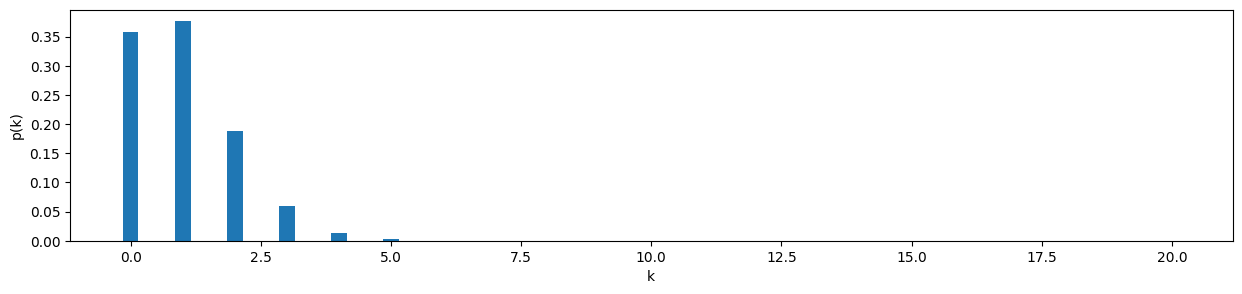

In [222]:
# Probability mass function
krange = range(21)
pmf = [stats.binom.pmf(n=20, k=k, p=0.05) for k in krange]
plt.bar(krange, pmf, width=0.3)
plt.xlabel("k")
plt.ylabel("p(k)")

In [223]:
# more than 3 pumps are defective
sum(pmf[4:])

0.015901526019763555

Text(0, 0.5, '$L( \\pi |k=8)$')

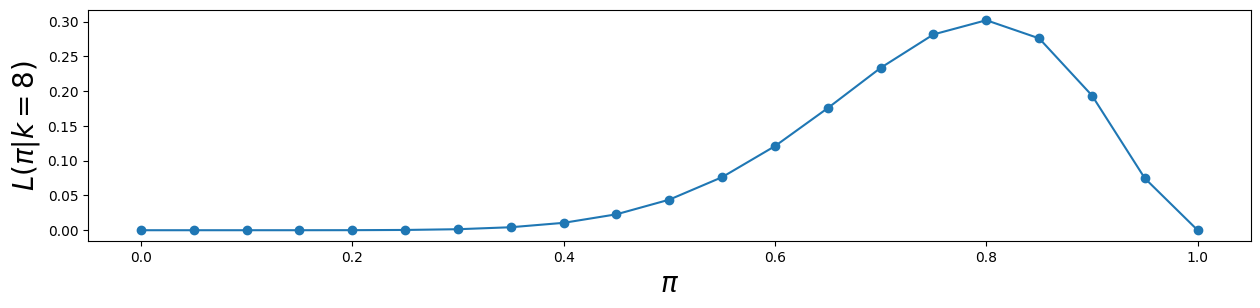

In [224]:
# Likelihood values
from scipy.stats import binom

pi_values = np.arange(0, 1.1, 0.05)
probs = [binom.pmf(k=8, n=10, p=pi) for pi in pi_values]

plt.figure(figsize=(15, 3))
plt.plot(pi_values, probs, marker="o")
plt.xlabel("$ \\pi $", fontsize=20)
plt.ylabel("$L( \\pi |k=8)$", fontsize=20)

In [225]:
# read csv
df = pd.read_csv("01_week/covid_tests.csv")
df = df.drop(["test_date", "age_60_and_above", "gender", "test_indication"], axis=1)
df = df[df.corona_result.isin(["positive", "negative"])]
df.corona_result = df.corona_result.replace({'positive': 1.0, 'negative': 0.0})
df.sample(5)

P_symptoms_given_covid = df[df.corona_result == 1].drop('corona_result', axis=1).mean()

/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_41470/3027411355.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("01_week/covid_tests.csv")
/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_41470/3027411355.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.corona_result = df.corona_result.replace({'positive': 1.0, 'negative': 0.0})


0.07894736842105263

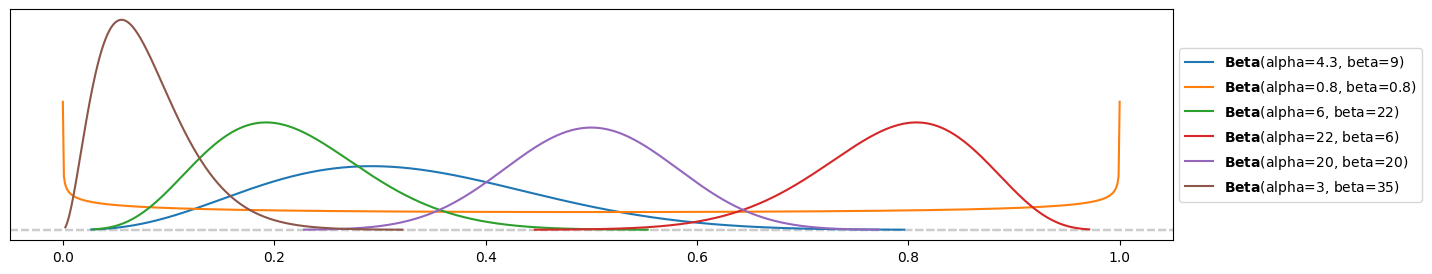

In [226]:
# Beta distribution
pz.Beta(4.3, 9).plot_pdf()
pz.Beta(0.8, 0.8).plot_pdf()
pz.Beta(6, 22).plot_pdf()
pz.Beta(22, 6).plot_pdf()
pz.Beta(20, 20).plot_pdf()
pz.Beta(3, 35).plot_pdf()
pz.Beta(3, 35).mean()

/Users/davebrunner/.local/share/virtualenvs/TSM_BayMachLe-lxpApnjz/lib/python3.12/site-packages/numba/np/ufunc/dufunc.py:287: RuntimeWarning: invalid value encountered in nb_logpdf
  return super().__call__(*args, **kws)


Gamma(mean=1.6, median=1.57, std=0.4, lower=0.94, upper=2.43)

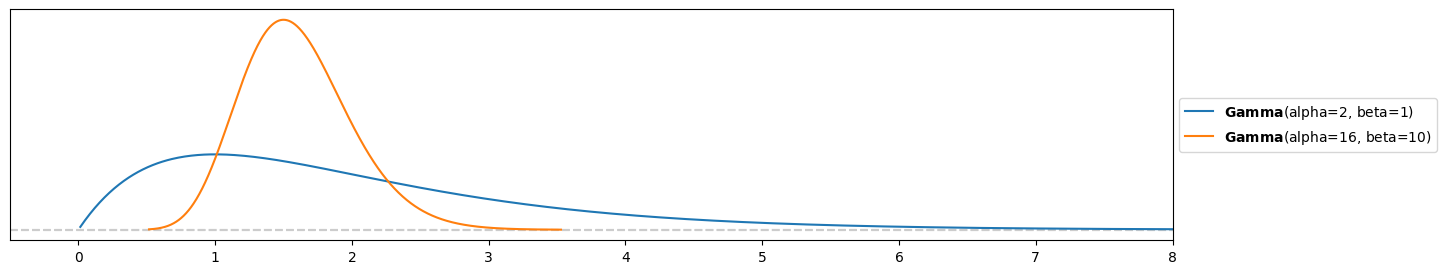

In [227]:
# Gamma distribution
s = 2
r = 1
y_sum = 14
n = 9
pz.Gamma(s, r).plot_pdf()
pz.Gamma(s + y_sum, r + n).plot_pdf()
plt.xlim(-0.5, 8)
pz.Gamma(s + y_sum, r + n).summary()

<Axes: >

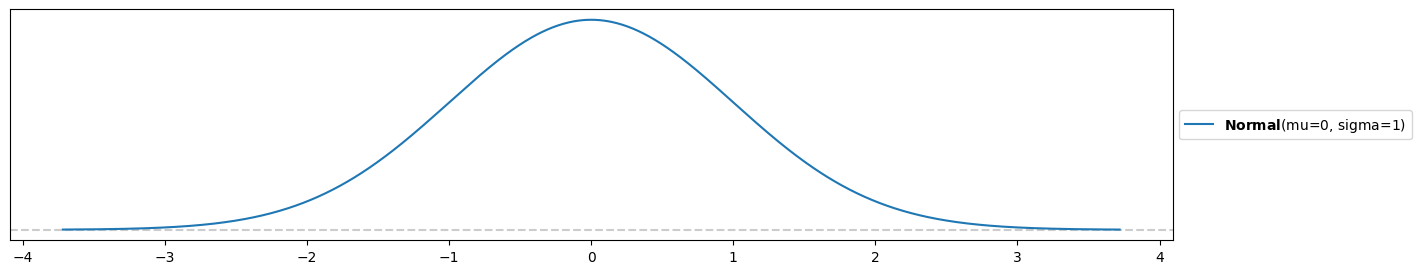

In [228]:
# Normal distribution
pz.Normal(0, 1).plot_pdf()

<Axes: >

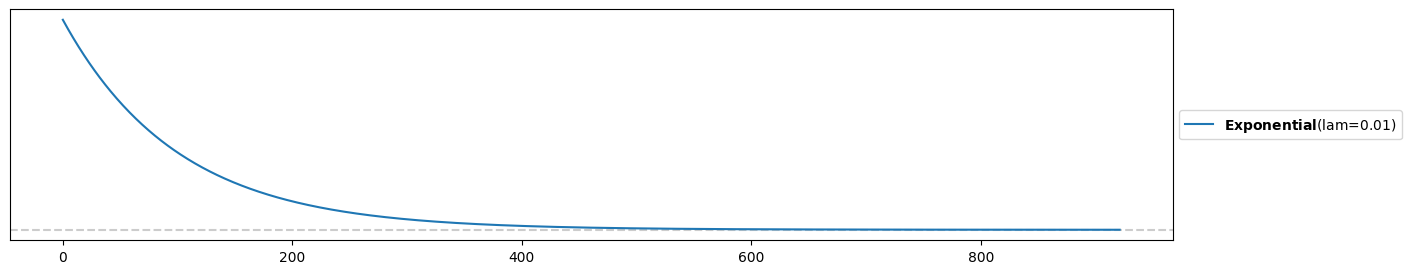

In [229]:
# Exponential distribution
pz.Exponential(1 / 100).plot_pdf()

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


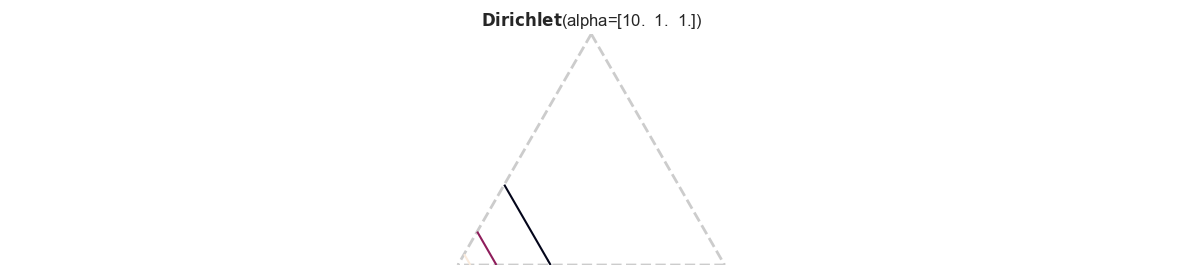

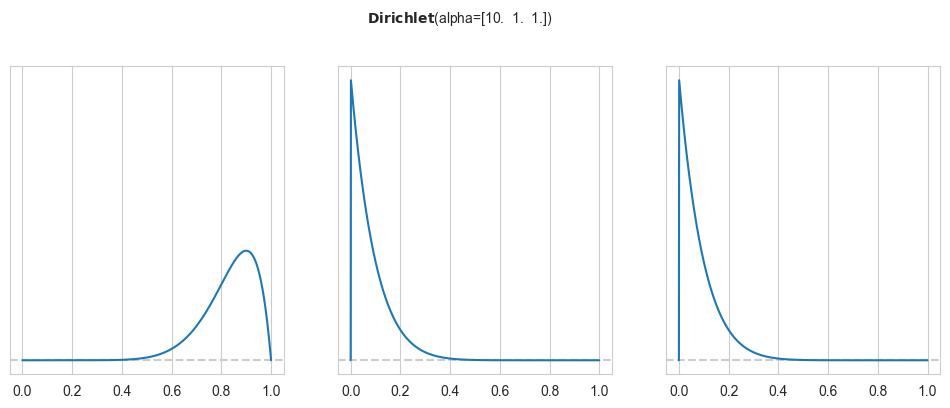

In [3]:
# Dirichlet Multinomial Distribution
pz.Dirichlet([10, 1, 1]).plot_pdf(marginals=False)
pz.Dirichlet([10, 1, 1]).plot_pdf()

In [230]:
# Sample from the prior distribution
n = 100
lmbd_vals = pz.Gamma(2, 1).rvs(n)
# draw 9 samples
samples = [sorted(list(pz.Poisson(mu=lmbd).rvs(9))) for lmbd in lmbd_vals]
samples[:10]

[[1, 1, 1, 2, 2, 2, 2, 2, 3],
 [0, 1, 2, 2, 2, 2, 3, 4, 4],
 [0, 1, 1, 2, 2, 2, 3, 3, 3],
 [1, 1, 1, 3, 3, 4, 4, 5, 10],
 [0, 0, 0, 1, 1, 1, 1, 1, 2],
 [1, 1, 1, 2, 2, 2, 3, 3, 5],
 [2, 3, 4, 5, 6, 6, 8, 8, 9],
 [1, 1, 1, 1, 2, 2, 2, 4, 5],
 [0, 2, 3, 3, 3, 4, 4, 4, 7],
 [0, 1, 1, 1, 2, 2, 2, 2, 3]]

In [231]:
# simulate coin tosses
n1 = 10;
n2 = 30;
n3 = 100
pi_true = 0.7
k1 = np.sum(np.random.choice([0, 1], p=[1 - pi_true, pi_true], size=n1))
k2 = np.sum(np.random.choice([0, 1], p=[1 - pi_true, pi_true], size=n2))
k3 = np.sum(np.random.choice([0, 1], p=[1 - pi_true, pi_true], size=n3))
k1 / n1, k2 / n2, k3 / n3

(0.4, 0.6333333333333333, 0.76)

In [232]:
# plot beta binomial
def plot_beta_binomial(alpha, beta, n, k, figsize=(13, 3)):
    # create figure
    plt.figure(figsize=figsize)

    # numeric evaluation range for pi
    pi_range = np.linspace(0, 1, 1000)

    # prior
    prior = [stats.beta.pdf(pi, a=alpha, b=beta) for pi in pi_range]
    plt.plot(pi_range, prior, alpha=0.5, label="prior", c="orange")
    plt.fill_between(pi_range, prior, alpha=0.3, color="orange")

    # scaled likelihood
    likelihood = [stats.binom.pmf(n=n, k=k, p=pi) for pi in pi_range]
    likelihood /= np.sum(likelihood) * (pi_range[1] - pi_range[0])
    plt.plot(pi_range, likelihood, alpha=0.5, label="(scaled) likelihood", c="blue")
    plt.fill_between(pi_range, likelihood, alpha=0.3, color="blue")

    # posterior
    posterior = [stats.beta.pdf(pi, a=alpha + k, b=beta + n - k) for pi in pi_range]
    plt.plot(pi_range, posterior, alpha=0.5, label="posterior", color="darkgreen")
    plt.fill_between(pi_range, posterior, alpha=0.3, color="darkgreen")

    # enable legend and set descriptive title
    plt.legend(fontsize=14)
    plt.title("$\\alpha = {}, \\beta={}, n={}, k={}$".format(alpha, beta, n, k))

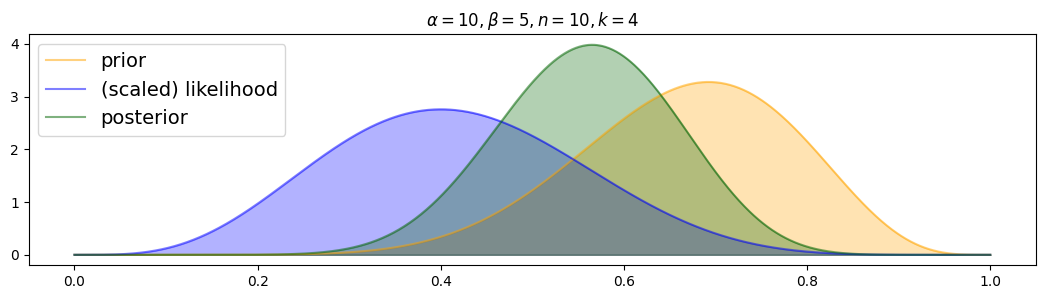

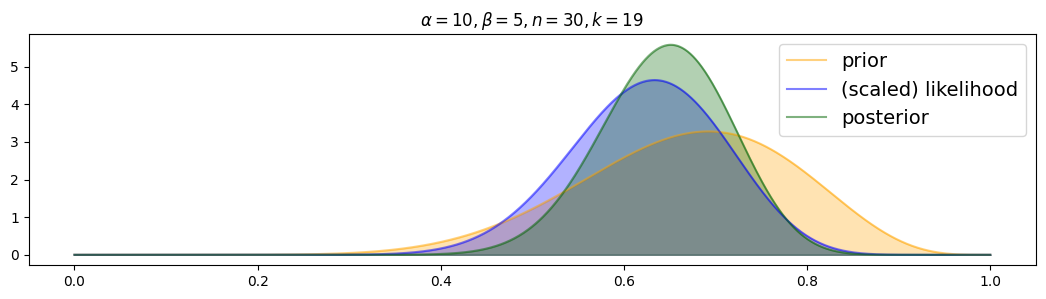

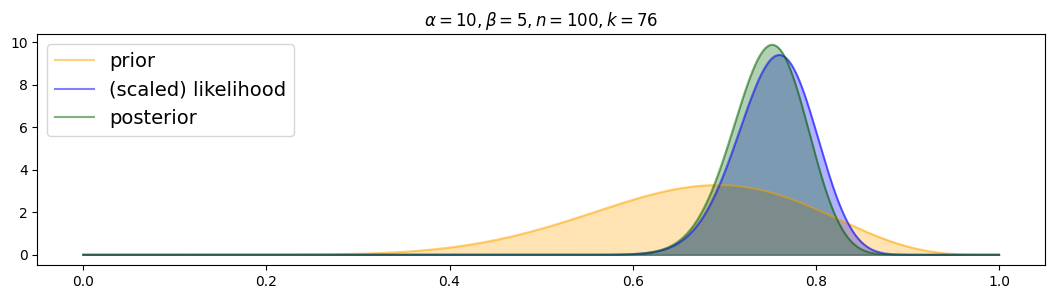

In [233]:
for i, (n, k) in enumerate([(n1, k1), (n2, k2), (n3, k3)]):
    plot_beta_binomial(alpha=10, beta=5, n=n, k=k)

In [235]:
# PyMC sample posterior with Normal prior and Exponential prior and Normal likelihood
observations = [1055, 1053, 1226, 967, 980, 1049, 1040, 1051, 1002, 1057]

with pm.Model() as norm_exp_normal_model:
    mu = pm.Normal('mu', mu=1000, sigma=100)  # is normal prior
    sigma = pm.Exponential('sigma', lam=1 / 100)  # is exponential prior
    norm_lik = pm.Normal('norm_lik', mu=mu, sigma=sigma, observed=observations)  # is the likelihood
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [236]:
# empirical version of it
observations = [1055, 1053, 1226, 967, 980, 1049, 1040, 1051, 1002, 1057]
ob_mu = np.mean(observations)
ob_std = np.std(observations, ddof=1)

with pm.Model() as norm_exp_normal_model_empirical:
    mu = pm.Normal('mu', mu=ob_mu, sigma=ob_std)  # is normal prior
    sigma = pm.Exponential('sigma', lam=1 / 100)  # is exponential prior
    norm_lik = pm.Normal('norm_lik', mu=mu, sigma=sigma, observed=observations)  # is the likelihood
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_b, mu_a, sig_b, sig_a]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


<xarray.Dataset> Size: 64B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    x        (hdi) float64 16B -0.5039 3.145

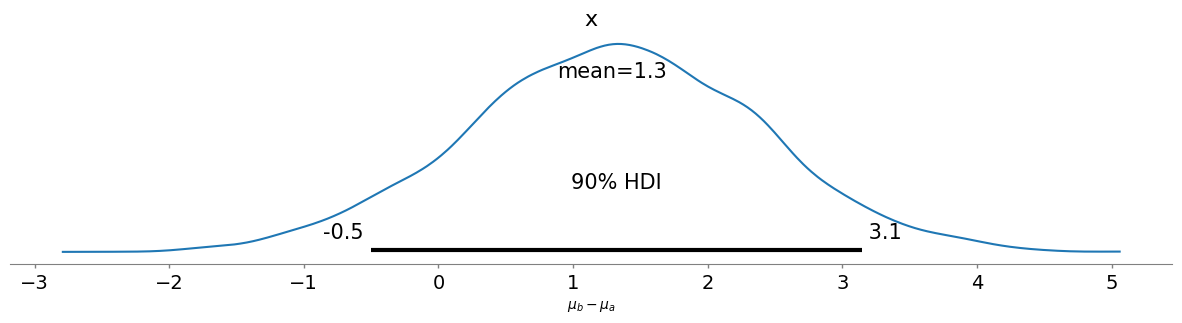

In [237]:
# railway counter example, difference in queue sizes
y1 = np.array([13, 10, 9, 5, 8, 8, 9, 7, 9, 8])
y2 = np.array([4., 9, 9, 11, 7, 6, 6, 3, 10, 4])
with pm.Model() as railway_counter_queue_model:
    mu_b = pm.Normal('mu_b', mu=10, sigma=2)
    mu_a = pm.Normal('mu_a', mu=10, sigma=2)
    sig_b = pm.Exponential('sig_b', lam=1 / 3)
    sig_a = pm.Exponential('sig_a', lam=1 / 3)
    y_b = pm.Normal('y_b', mu=mu_b, sigma=sig_b, observed=y1)
    y_a = pm.Normal('y_a', mu=mu_a, sigma=sig_a, observed=y2)
    trace = pm.sample(1000)
diff = trace.posterior.mu_b - trace.posterior.mu_a
pm.plot_posterior(diff, hdi_prob=0.9)
plt.xlabel("$\\mu_b - \\mu_a$")
pm.hdi(diff, hdi_prob=0.9)

Sampling: [y_new]


Output()

<Axes: title={'center': 'y_new'}>

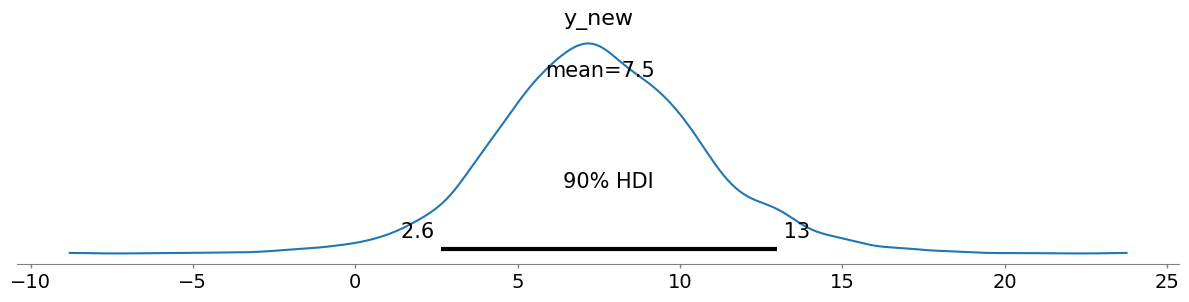

In [240]:
# Make prediction with PyMC
with railway_counter_queue_model:
    y_new = pm.Normal('y_new', mu=mu_a, sigma=sig_a)
    predictions = pm.sample_posterior_predictive(trace, var_names=["y_new"])

pm.plot_posterior(predictions, group="posterior_predictive", hdi_prob=0.9)
# on average 7.4 people in queue
# with 90% confidence between 2.1 and 13 people in queue

In [241]:
# HDI
pm.hdi(predictions.posterior_predictive.y_new, hdi_prob=0.9).y_new.values

array([ 2.63520072, 12.98657991])

In [242]:
# calculate aleatoric and epistemic uncertainty
aleatoric_var = np.mean(trace.posterior.sig_a.values ** 2)
epistemic_var = np.var(trace.posterior.mu_a.values)
pred_var = np.var(predictions.posterior_predictive.y_new.values)
np.round(np.array([aleatoric_var, epistemic_var]) / (aleatoric_var + epistemic_var) * 100, 1)
# x% aleatoric & y% epistemic uncertainty

array([92.5,  7.5])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'pi'}>,
        <Axes: title={'center': 'pi'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

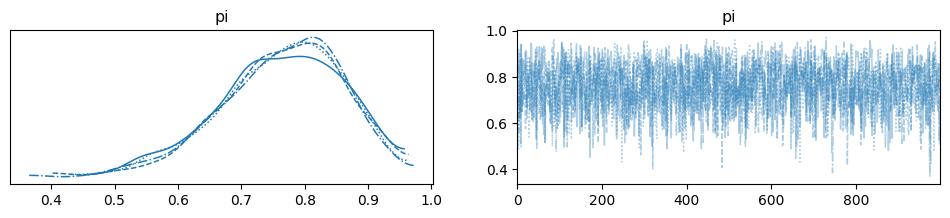

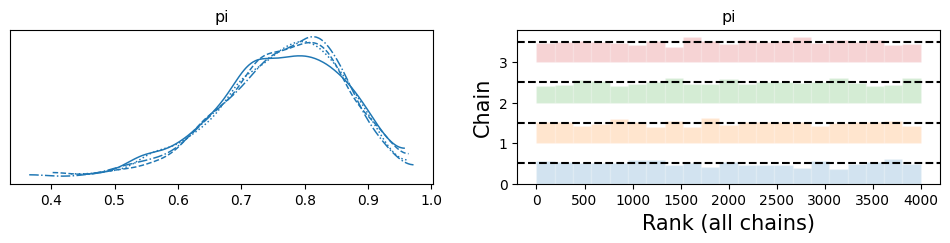

In [245]:
# PyMC sample posterior with Beta prior and Binomial likelihood
alpha = 5
beta = 2
n = 10
k = 8
with pm.Model() as beta_binom_model:
    pi = pm.Beta('pi', alpha=alpha, beta=beta)  # is the prior
    y = pm.Binomial('y', p=pi, n=n, observed=k)  # is the likelihood
    trace = pm.sample(1000)
pm.plot_trace(trace)
pm.plot_trace(trace, kind="rank_bars")

In [246]:
# calculate aleatoric and epistemic uncertainty with faulty screw model
n_new = 30000
aleatoric_vars = n_new * trace.posterior.pi.values * (1 - trace.posterior.pi.values)
aleatoric_var = np.mean(aleatoric_vars)
aleatoric_var
epistemic_var = np.var(trace.posterior.pi.values * n_new)
epistemic_var

8401962.611926

In [247]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
pi,0.763,0.097,0.586,0.939,0.002,0.002,1697.0,2174.0,1.0


In [251]:
ess = pm.ess(trace).pi.values
ess / 4000
# Much larger than the required 10%!

0.4241306666322924

In [252]:
pm.rhat(trace).pi.values
# Looks good! (<< 1.05)

array(1.00166945)

In [1]:
# Student T Distribution PyMc
y_mean = 10
y_std = 5
with pm.Model() as student_t:
    mu = pm.Normal("mu", mu=y_mean, sigma=y_std)
    sig = pm.Exponential("sig", lam=1 / y_std)
    v = pm.Gamma("v", alpha=10, beta=1.1)
    stu = pm.StudentT("stu", mu=mu, sigma=sig, nu=v, observed=observations)
    trace = pm.sample(1000)
pm.plot_posterior(trace, figsize=(15, 3), hdi_prob=0.9)

NameError: name 'pm' is not defined

In [ ]:
# Multinomial Distribution -> generalization of the binomial distribution
feedback_premium = 82
feedback_coverage = 24
feedback_models = 6
params = [feedback_premium, feedback_coverage, feedback_models]

with pm.Model() as insurance_multi:
    pi = pm.Dirichlet("pi", a=[1, 1, 1])
    y = pm.Multinomial("y", n=np.sum(params), p=pi, observed=params)
    trace3 = pm.sample(1000)

In [1]:
# Dirichlet Multinomial conjugacy | Posterior dirichlet
alpha = np.array([1, 1, 1])
pz.Dirichlet(alpha + params).plot_pdf(marginals=False)

NameError: name 'np' is not defined

In [256]:
# Multivariat Normal Distribution
y_obs = [165.5, 138.7, 139.7, 133.1, 156.4, 118.4, 166.9, 136.9, 149.8, 143., 163.5, 121.3, 142.1, 141.4, 159.6, 132.8,
         143.9, 135.5, 146.5, 153., 132.8, 159.7, 156.8, 152., 156.8, 137.8, 144.5, 134.8, 142.8, 152.4, 137.7, 141.2,
         137.8, 135.9, 137.9, 145.8, 132.6, 148.8, 165.9, 154.9, 220., 135.3, 137., 166.3, 146.6, 138.4, 148.3, 171.2,
         147.4, 153.4, 149.6, 141.8, 132.3]
y_mean = np.mean(y_obs)
y_std = np.std(y_obs, ddof=1)
with pm.Model() as toilet_model:
    mu = pm.Normal("mu", mu=y_mean, sigma=y_std)
    sig = pm.Exponential("sig", lam=1 / y_std)
    y = pm.Normal("y", mu=mu, sigma=sig, observed=y_obs)
    trace = pm.sample(1000)
    predictions = pm.sample_posterior_predictive(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sig]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [y]


Output()

array([[<Axes: >, None],
       [<Axes: xlabel='mu', ylabel='sig'>, <Axes: >]], dtype=object)

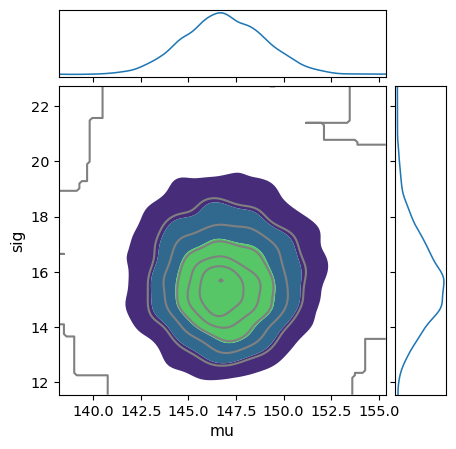

In [257]:
# Plot pair
pm.plot_pair(trace, kind="kde", figsize=(5, 5), marginals=True)

In [258]:
# Covariance marix of the multivariat normal distribution
data = np.hstack(
    [trace.posterior.mu.values.flatten().reshape(-1, 1), trace.posterior.sig.values.flatten().reshape(-1, 1)])
print(np.cov(data.T))

[[ 4.52852386 -0.006325  ]
 [-0.006325    2.47775006]]


In [259]:
# RSME and MAE
ypred_normal = predictions.posterior_predictive.y.values.reshape(-1, 53)
difference = ypred_normal - y_obs
rsme = np.sqrt(np.mean(difference ** 2))
mae = np.mean(np.abs(difference))
print(f"RSME: {rsme:.2f}, MAE: {mae:.2f}")

RSME: 22.08, MAE: 16.81


In [ ]:
# Posterior Predictive Check / Test
pm.plot_ppc(predictions)

In [ ]:
# Compare models with expected log predictive density (ELPD)
with toilet_model:
    pm.compute_log_likelihood(trace)
loo1 = pm.loo(trace)
with student_t:
    pm.compute_log_likelihood(trace_2)
loo2 = pm.loo(trace_2)
df_comp_loo = pm.compare({"Normal Likelihood": loo1, "StudentT Likelihood": loo2})
pm.plot_compare(df_comp_loo);
df_comp_loo
# In terms of ELPD, the model with the Student's likelihood is not significantly better (by the one-standard-error rule) than the model with the normal likelihood. This would probably change with more data and is due to the additional uncertainties (e.g. in the estimation of $\nu$).

In [35]:
# Simple Linear Regression with Bambi
import bambi as bmb

credit_data = pd.read_csv("06_week/Exercises/credit_data.csv")

credit_model_1 = bmb.Model("Balance ~ Limit", data=credit_data, family="gaussian")
credit_trace_1 = credit_model_1.fit(draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, Limit]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2 seconds.


In [29]:
credit_trace_1

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [30]:
credit_model_1.backend.model

    sigma ~ HalfStudentT(4, 459)
Intercept ~ Normal(520, 2.62e+03)
    Limit ~ Normal(0, 0.498)
       mu ~ Deterministic(f(Limit, Intercept))
  Balance ~ Normal(mu, sigma)

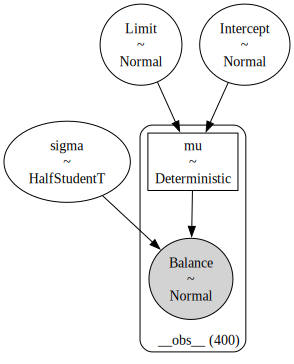

In [31]:
credit_model_1.graph()

array([<Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 'Limit'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

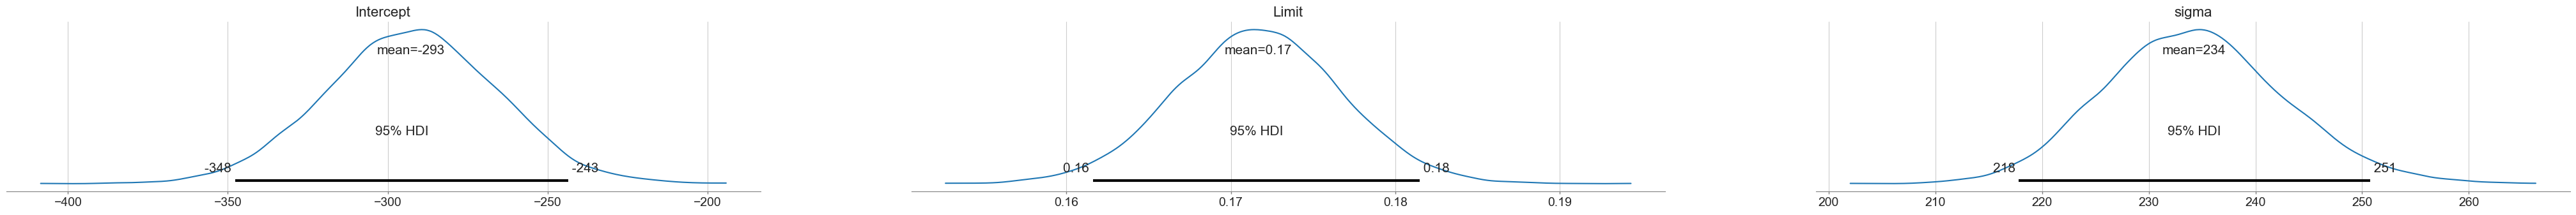

In [32]:
pm.summary(credit_trace_1)
pm.plot_posterior(credit_trace_1, hdi_prob=0.95)
# For every dollar in limit increase there is an additional 14 cents in Balance increase

Default computed for conditional variable: Limit


(<Figure size 1500x300 with 1 Axes>,
 array([<Axes: xlabel='Limit', ylabel='Balance'>], dtype=object))

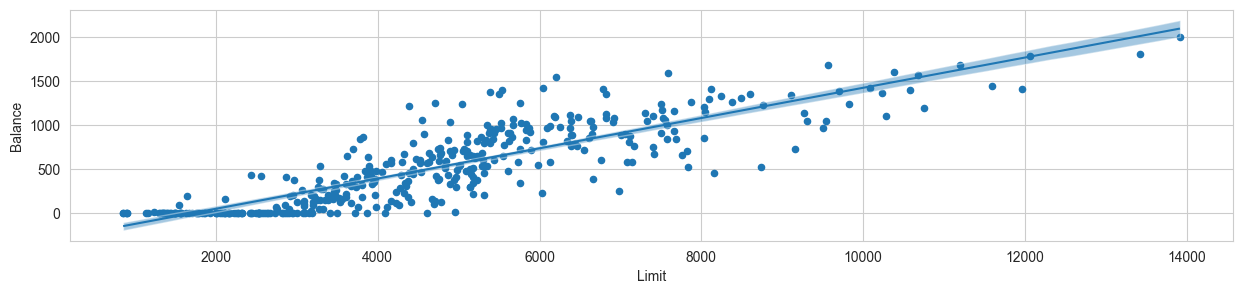

In [33]:
credit_data.plot.scatter(x="Limit", y="Balance")
bmb.interpret.plot_predictions(credit_model_1, credit_trace_1, "Limit", prob=0.95, ax=plt.gca())

In [40]:
# RMSE, MAE, Rhat
credit_model_1.predict(credit_trace_1, kind="response")

ypred = az.extract(credit_trace_1.posterior_predictive).Balance.values.T
ytrue = credit_data.Balance.values
difference = ypred - ytrue
rsme = np.sqrt(np.mean(difference ** 2))
mae = np.mean(np.abs(difference))
rhat = pm.r2_score(ytrue, ypred)
print(f"RSME: {rsme:.2f}, MAE: {mae:.2f}")
print(f"Rhat: {rhat}")

RSME: 331.09, MAE: 260.70
Rhat:


r2        0.658947
r2_std    0.018794
dtype: float64

In [1]:
# Aleatoric and Epistemic uncertainty with bambi for a specific input variable
pred = credit_model_1.predict(credit_trace_1, kind="response", data=pd.DataFrame({'Limit': [3000]}), inplace=False)

e_unc = pred.posterior.mu.var().values.item()
e_unc
p_unc = pred.posterior_predictive.Balance.values.var()
p_unc
a_unc = p_unc - e_unc
a_unc
print(f"Epistemic uncertainty: {np.sqrt(e_unc):.2f}, Aleatoric uncertainty: {np.sqrt(a_unc):.2f}")

NameError: name 'credit_model_1' is not defined

In [ ]:
# ELPD with bambi model
with bodyfat_model.backend.model:
    pm.compute_log_likelihood(bodyfat_trace)
with bodyfat_model_t.backend.model:
    pm.compute_log_likelihood(bodyfat_trace_t)
compare_dict = {
    'Normal model': bodyfat_trace,
    'Robust model': bodyfat_trace_t
}
comp = pm.compare(compare_dict)
comp

# Bayesian Linear Regression

In [45]:
# Libary functions
# all these function can be found in Solutions_Exercises_week7_BLR.ipynb
log_npdf = lambda x, m, v: -0.5 * np.log(2 * np.pi * v) - 0.5 * (x - m) ** 2 / v


def predict(x, a, b):
    return a * x + b


def mvn_pdf(x, mu, Sigma, log=True):
    D = len(mu)
    Sigma = Sigma + 1e-10 * np.identity(D)
    L = np.linalg.cholesky(Sigma)
    v = np.linalg.solve(L, x - mu)
    const_term = -0.5 * D * np.log(2 * np.pi)
    det_term = -0.5 * 2 * np.sum(np.log(np.diag(L)))
    quad_term = -0.5 * np.sum(v ** 2)
    if log:
        return const_term + det_term + quad_term
    else:
        return np.exp(const_term + det_term + quad_term)


def log_prior(a, b, m, S):
    return mvn_pdf(np.array([a, b])[:, None], m, S, log=True)


def log_likelihood(x, y, a, b):
    return np.sum(log_npdf(y, predict(x, a, b), sigma2))


def log_posterior(x, y, a, b, m, S):
    log_posterior = log_prior(a, b, m, S) + log_likelihood(x, y, a, b)
    return log_posterior

In [28]:
# Bayesian Linear Regression
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

x0 = np.ones(30).astype(float)
x1 = np.array(
    [50, 55, 59, 61, 79, 81, 88, 90, 91, 97, 99, 105, 107, 110, 111, 112, 116, 117, 121, 123, 124, 125, 135, 141, 142,
     144, 145, 149, 150, 151])
y = np.array(
    [0.36, 0.37, 0.28, 0.29, 0.3, 0.5, 0.58, 0.61, 0.62, 0.78, 0.77, 0.83, 0.78, 0.84, 0.91, 0.95, 1.05, 0.99, 0.97,
     0.93, 0.81, 0.9, 1.1, 0.98, 0.88, 1.05, 1.02, 1.1, 1.08, 1.12])
X_test = np.linspace(x1.min() - 1, x1.max() + 1, 1000).reshape(-1, 1)

In [29]:
# GP with scikit-learn
kernel = RBF(1.0) + WhiteKernel(noise_level=1.0)
# train GP
gpr = (GaussianProcessRegressor(kernel=kernel, random_state=0).fit(np.array(x1).reshape(-1, 1), y))

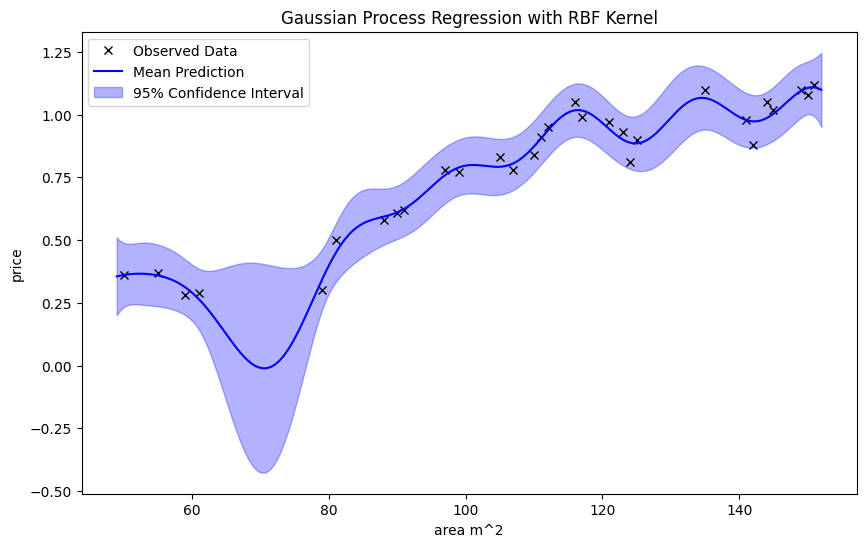

In [30]:
# GP predictions
y_mean, y_std = gpr.predict(X_test, return_std=True)

# Plot prediction
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x1, y, 'kx', label="Observed Data")  # Original data points
plt.plot(X_test, y_mean, 'b-', label="Mean Prediction")  # Mean prediction line
plt.fill_between(X_test.ravel(),  # Confidence interval as shaded area
                 y_mean - 1.96 * y_std,
                 y_mean + 1.96 * y_std,
                 alpha=0.3, color='blue', label="95% Confidence Interval")
# Labels and legend
plt.xlabel("area m^2")
plt.ylabel("price")
plt.title("Gaussian Process Regression with RBF Kernel")
plt.legend()
plt.show()

In [31]:
# GP Rhat metric
gpr.score(np.array(x1).reshape(-1, 1), y)

0.9827990109592706

In [32]:
# Print the optimized kernel and hyperparameters
print("Optimized Kernel:", gpr.kernel_)
print("Hyperparameters:", gpr.kernel_.get_params())

Optimized Kernel: RBF(length_scale=10) + WhiteKernel(noise_level=0.00218)
Hyperparameters: {'k1': RBF(length_scale=10), 'k2': WhiteKernel(noise_level=0.00218), 'k1__length_scale': 10.001535288181483, 'k1__length_scale_bounds': (1e-05, 100000.0), 'k2__noise_level': 0.0021837848755128847, 'k2__noise_level_bounds': (1e-05, 100000.0)}


In [33]:
# sample from multivariate normal distribution
from scipy.stats import multivariate_normal

x_test = np.array([1, 1])
m = np.zeros((2, 1))
S = 1.0 * np.identity(2)

pdf = multivariate_normal.pdf(x_test, mean=m.flatten(), cov=S)
pdf

0.05854983152431917

In [34]:
# Sample from multivariate normal distribution
def generate_mvn_samples(mu, Sigma, M):
    """ return samples from a multivariate normal distribution N(mu, Sigma)
    Arguments:
    mu      -- (Dx1) mean vector
    Sigma   -- (DxD) covariance matrix
    M       -- (scalar) number of samples
    Returns:
    (DxM) matrix, where each column corresponds to a sample
    """
    jitter = 1e-8
    D = len(mu)
    L = np.linalg.cholesky(Sigma + jitter * np.identity(D))
    zs = np.random.normal(0, 1, size=(D, M))
    fs = mu + np.dot(L, zs)
    return fs

In [35]:
# Compute GP Posterior distribution
def compute_posterior(x, y, m, S, sigma2=2):
    """ return the posterior mean and covariance of w given (x,y)
    and hyperparameters m, S and sigma2
    Arguments:
    x      -- (Nx1) vector of inputs
    y      -- (Nx1) vector of responses
    m      -- (Dx1) prior mean
    S      -- (DxD) prior covariance
    sigma2 -- (scalar) noise variance
    Returns:
    mu     -- (Dx1) posterior mean
    Sigma  -- (DxD) posterior covariance
    """
    import scipy as sc
    Sinv = np.linalg.inv(S)
    X = np.column_stack((x, np.ones(len(x))))
    Sigmainv = Sinv + np.dot(X.T, X) / sigma2
    L = sc.linalg.cho_factor(Sigmainv)
    scaled_mu = np.dot(X.T, y) / sigma2 + np.linalg.solve(S, m)
    mu = sc.linalg.cho_solve(L, scaled_mu)
    Sigma = sc.linalg.cho_solve(L, np.identity(len(m)))

    return mu, Sigma


m = np.zeros((2, 1))
S = 1.0 * np.identity(2)
# noise variance
sigma2 = 2
# data
x = np.array([1.764, 0.4, 0.979, 2.241, 1.868, -0.977, 0.95, -0.151])[:, None]
y = np.array([-0.464, 2.024, 3.191, 2.812, 6.512, -3.022, 1.99, 0.009])[:, None]
# calculate
mu, Sigma = compute_posterior(x, y, m, S, sigma2)
print(f'mu:\n{mu} \nSigma:\n{Sigma}')

mu:
[[1.47967386]
 [0.25847871]] 
Sigma:
[[ 0.17215668 -0.12178364]
 [-0.12178364  0.28614974]]


Text(0.5, 1.0, 'Posterior')

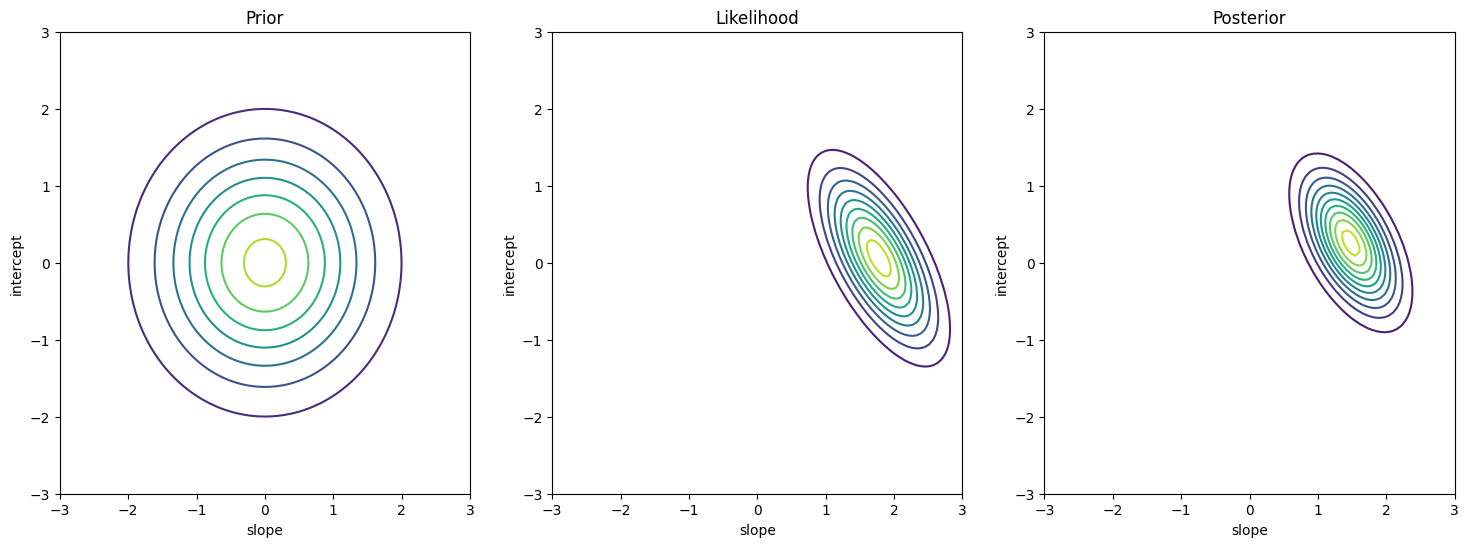

In [36]:
# Plot Prior, Likelihood, Posterior
a_array = np.linspace(-3, 3, 100)
b_array = np.linspace(-3, 3, 100)


def log_to_density(Z):
    Z = Z - np.max(Z)
    Z = np.exp(Z)
    return Z / np.sum(Z)


def plot_prior_density(m, S):
    ###############################################
    # ------- insert code here -------------------
    ###############################################

    A_array, B_array = np.meshgrid(a_array, b_array)
    Z = np.array([log_prior(ai, bi, m, S) for (ai, bi) in zip(A_array.ravel(), B_array.ravel())])
    Z = Z.reshape((len(a_array), len(b_array)))
    plt.contour(a_array, b_array, log_to_density(Z))
    plt.xlabel('slope')
    plt.ylabel('intercept');


def plot_likelihood(x, y):
    ###############################################
    # ------- insert code here -------------------
    ###############################################

    A_array, B_array = np.meshgrid(a_array, b_array)
    Z = np.array([log_likelihood(x, y, ai, bi) for (ai, bi) in zip(A_array.ravel(), B_array.ravel())])
    Z = Z.reshape((len(a_array), len(b_array)))
    plt.contour(a_array, b_array, log_to_density(Z), 10)
    plt.xlabel('slope')
    plt.ylabel('intercept');


def plot_posterior_density(x, y, m, S):
    ###############################################
    # ------- insert code here -------------------
    ###############################################

    A_array, B_array = np.meshgrid(a_array, b_array)
    Z = np.array([log_posterior(x, y, ai, bi, m, S) for (ai, bi) in zip(A_array.ravel(), B_array.ravel())])
    Z = Z.reshape((len(a_array), len(b_array)))
    plt.contour(a_array, b_array, log_to_density(Z), 10)
    plt.xlabel('slope')
    plt.ylabel('intercept');


# plot
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plot_prior_density(m, S)
plt.title('Prior')

plt.subplot(1, 3, 2)
plot_likelihood(x, y)
plt.title('Likelihood')

plt.subplot(1, 3, 3)
plot_posterior_density(x, y, m, S)
plt.title('Posterior')

Text(0.5, 1.0, 'Posterior')

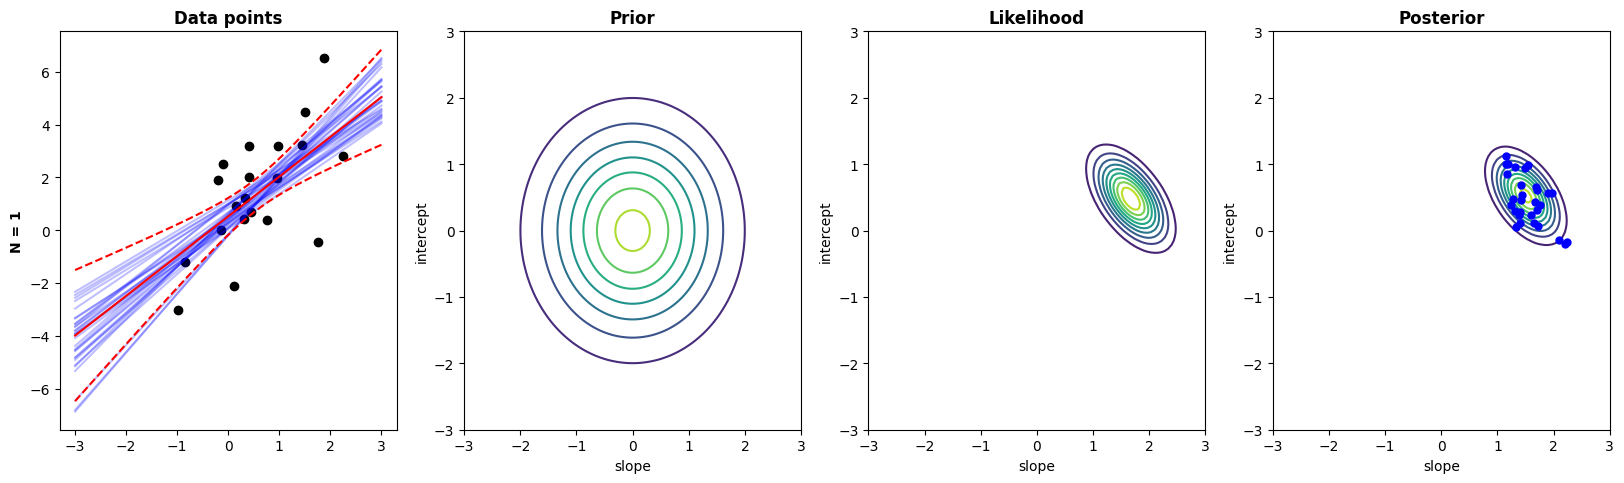

In [42]:
def compute_f_posterior(x, mu, Sigma):
    """ compute the posterior distribution of f(x) wrt. posterior distribution N(mu, Sigma)
    Arguments:
    x      -- (Nx1) vector of inputs
    mu     -- (2x1) mean vector
    Sigma  -- (2x2) covariance matrix
    Returns:
    mu_f   -- (Nx1) vector of pointwise posterior means at x
    var_f  -- (Nx1) vector of pointwise posterior variances at x
    """
    X = np.column_stack((x, np.ones(len(x))))
    mu_f = np.dot(X, mu)
    var_f = np.diag(np.dot(np.dot(X, Sigma), X.T))[:, None]

    return mu_f, var_f


# New data set with more data points
N_2 = 20
x_2 = np.array([1.764, 0.4, 0.979, 2.241, 1.868, -0.977, 0.95, -0.151, -0.103, 0.411, 0.144, 1.454, 0.761, 0.122,
                0.444, 0.334, 1.494, -0.205, 0.313, -0.854])[:, None]
y_2 = np.array([-0.464, 2.024, 3.191, 2.812, 6.512, -3.022, 1.99, 0.009, 2.513, 3.194, 0.935, 3.216, 0.386, -2.118,
                0.674, 1.222, 4.481, 1.893, 0.422, -1.209])[:, None]

xp = np.linspace(-3, 3, 50)[:, None]

plt.figure(figsize=(20, 30))

# compute posterior & generate samples
mu, Sigma = compute_posterior(x_2, y_2, m, S, sigma2)
ahat, bhat = generate_mvn_samples(mu, Sigma, M=30)

# plot
plt.subplot2grid((5, 4), (1, 0))
plt.plot(x_2, y_2, 'k.', markersize=12)
plt.ylabel('N = %d' % n, fontweight='bold')
for (ai, bi) in zip(ahat, bhat):
    plt.plot(xp, predict(xp, ai, bi), 'b-', alpha=0.25)

# compute posterior distribution
mu_f, var_f = compute_f_posterior(xp, mu, Sigma)
std_f = np.sqrt(var_f)

# plot
plt.plot(xp, mu_f, 'r')
plt.plot(xp, mu_f + 2 * std_f, 'r--')
plt.plot(xp, mu_f - 2 * std_f, 'r--')
plt.title('Data points', fontweight='bold')
plt.subplot2grid((5, 4), (1, 1))
plot_prior_density(m, S)
plt.title('Prior', fontweight='bold')
plt.subplot2grid((5, 4), (1, 2))
plot_likelihood(x_2, y_2)
plt.title('Likelihood', fontweight='bold')
plt.subplot2grid((5, 4), (1, 3))
plot_posterior_density(x_2, y_2, m, S)
plt.plot(ahat, bhat, 'b.', markersize=10)
plt.title('Posterior', fontweight='bold')

# Gaussian Process GP

In [55]:
# Library functions
def generate_samples(mean, K, M):
    """ returns M samples from a zero-mean Gaussian process with kernel matrix K
    arguments:
    K   -- NxN kernel matrix
    M   -- number of samples (scalar)
    returns NxM matrix
    """
    jitter = 1e-8
    L = np.linalg.cholesky(K + jitter * np.identity(len(K)))
    zs = np.random.normal(0, 1, size=(len(K), M))
    fs = mean + np.dot(L, zs)
    return fs


The RBF matrix shape is (50, 50)


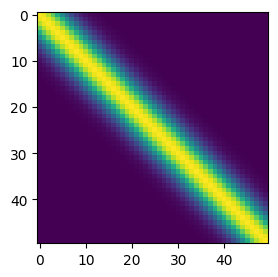

In [43]:
# Squared Exponential Kernel
# more in Solutions_Exercises_week7_GP.ipynb
def create_se_kernel(X1, X2, alpha=1, scale=1):
    """ returns the NxM kernel matrix between the two sets of input X1 and X2

    arguments:
    X1    -- NxD matrix
    X2    -- MxD matrix
    alpha -- scalar
    scale -- scalar

    returns NxM matrix
    """
    #print(np.sum(X1**2, axis=1)[:, np.newaxis].shape)
    #print(np.sum(X2**2, axis=1).shape)
    #dist_sq = np.sum(X1**2, axis=1)[:, np.newaxis] + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    dist_sq = np.sum((X1[:, None] - X2) ** 2, axis=2)

    kernel_matrix = alpha * np.exp(-dist_sq / (2 * (scale ** 2)))
    return kernel_matrix


# create an Nx1 vector of equidistant points in [-3, 3]
N = 50
Xp = np.linspace(-3, 9, N)[:, None]
Kpp = create_se_kernel(Xp, Xp, alpha=1, scale=1)
plt.imshow(Kpp, interpolation='None')
plt.grid(False)
print(f"\nThe RBF matrix shape is {Kpp.shape}")

In [59]:
# Computer the Posterior of a GP with Squared Exponential Kernel
def posterior(Xp, X, y, alpha, scale, sigma2):
    """ returns the posterior distribution of f evaluated at each of the points in Xp conditioned on (X, y)
        using the squared exponential kernel.

    Arguments:
    Xp    -- PxD prediction points
    X     -- NxD input points
    y     -- Nx1 observed values
    alpha -- hyperparameter
    scale -- hyperparameter
    sigma2 -- noise variance

    returns Px1 mean vector and PxP covariance matrix
    """

    ###############################################
    # ------- insert code here -------------------
    ###############################################

    K_f_f = create_se_kernel(X, X, alpha=alpha, scale=scale)
    K_fstar_f = create_se_kernel(Xp, X, alpha=alpha, scale=scale)
    K_fstar_fstar = create_se_kernel(Xp, Xp, alpha=alpha, scale=scale)

    post_mu = K_fstar_f @ np.linalg.inv(K_f_f + sigma2 * np.eye(X.shape[0])) @ y
    post_cov = K_fstar_fstar - K_fstar_f @ np.linalg.inv(K_f_f + sigma2 * np.eye(X.shape[0])) @ K_fstar_f.T
    return post_mu, post_cov


Xp = np.linspace(-3, 9, N)[:, None]
data = np.load('./07_week/Data/task_3_data.npz')
N = data['N']
X = data['X']
y = data['y']
alpha = 1
scale = 1

mu_prior, Sigma_prior = posterior(Xp, np.zeros((0, 1)), np.zeros((0, 1)), alpha, scale, sigma2)
mu_post, Sigma_post = posterior(Xp, X, y, alpha, scale, sigma2)
print(f"mu_post shape: {mu.shape}\nSigma_post shape:{Sigma_post.shape}")
# print(f"mu_post:\n{mu_post}\nSigma_post:\n{Sigma_post}")

mu_post shape: (2, 1)
Sigma_post shape:(50, 50)


(50, 1)
(50, 1)
(50, 50)
(50, 50)


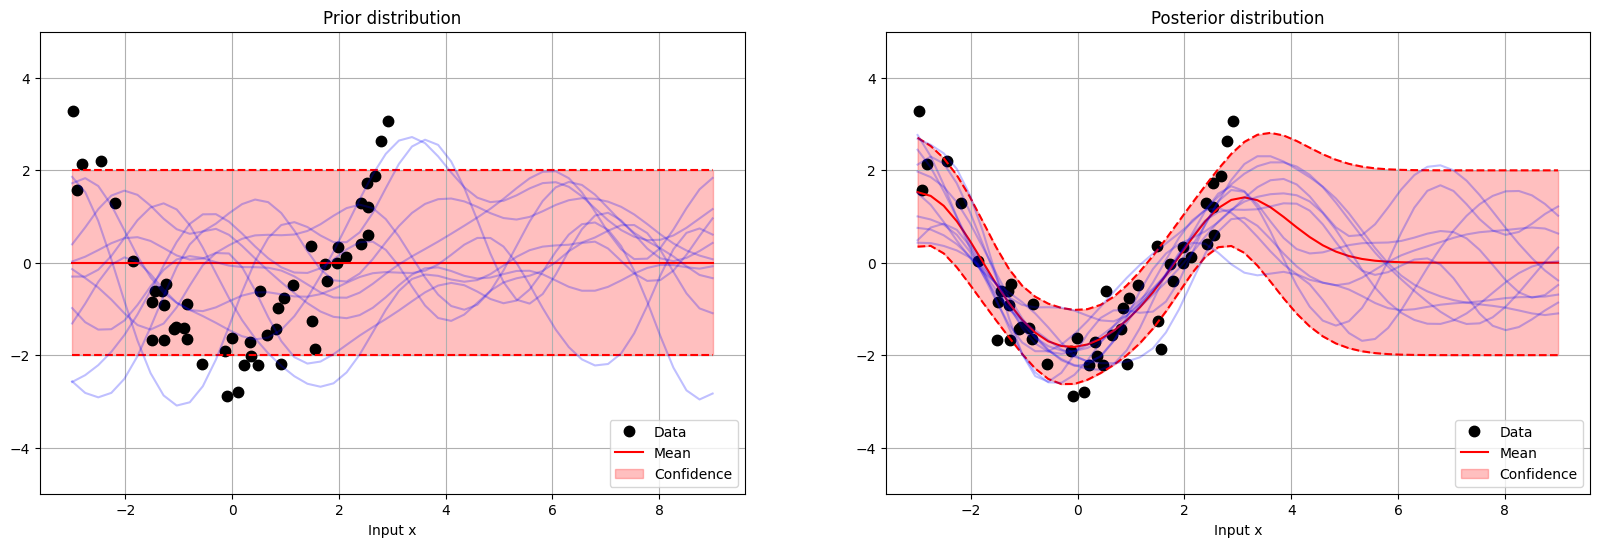

In [58]:
# Plot Prior and Posterior with uncertainty
def plot_with_uncertainty(Xp, mu, Sigma, color='r', color_samples='b', title="", num_samples=0):
    mean, std = mu.ravel(), np.sqrt(np.diag(Sigma))
    # plot distribution
    plt.plot(Xp, mean, color=color, label='Mean')
    plt.plot(Xp, mean + 2 * std, color=color, linestyle='--')
    plt.plot(Xp, mean - 2 * std, color=color, linestyle='--')
    plt.fill_between(Xp.ravel(), mean - 2 * std, mean + 2 * std, color=color, alpha=0.25, label='Confidence')
    # generate samples
    if num_samples > 0:
        fs = generate_samples(mu, Sigma, 10)
        plt.plot(Xp, fs, color=color_samples, alpha=.25)
    plt.title(title)


def plot_data():
    plt.plot(X, y, 'k.', markersize=15, label='Data')
    plt.xlabel('Input x')
    plt.ylim((-5, 5))
    plt.grid(True)


plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plot_data()
plot_with_uncertainty(Xp, mu_prior, Sigma_prior, title='Prior distribution', num_samples=10)
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plot_data()
plot_with_uncertainty(Xp, mu_post, Sigma_post, title='Posterior distribution', num_samples=10)
plt.legend(loc='lower right')
print(mu_prior.shape)
print(mu_post.shape)
print(Sigma_prior.shape)
print(Sigma_post.shape)

In [61]:
# Log Marginal Likelihood
def log_marginallikelihood(X_, y_, covariance_function_, params_):
    K = covariance_function_(X_, X_, params_)
    L = np.linalg.cholesky(K + params_[2] ** 2 * np.eye(K.shape[0]))  # Line 2
    temp = np.linalg.lstsq(L, y_, rcond=-1)[0]
    alpha = np.linalg.lstsq(np.transpose(L), temp, rcond=-1)[0]  # line 3
    m_lkhd = -0.5 * np.dot(y_.T, alpha) - np.sum(np.log(L.diagonal())) - X_.shape[0] / 2 * np.log(2 * np.pi)  # line 7
    return m_lkhd


def exponential_cov(x1, x2, params, report_flag=False):
    x1 = np.array([x1]).reshape(-1)
    x2 = np.array([x2]).reshape(-1)
    sigma_f_ = params[0]
    l_ = params[1]
    if (report_flag):
        print("RBF Kernel with following parameter:")
        print("length scale: ", l_)
        print("sigma_f :", sigma_f_)
    cov = sigma_f_ ** 2 * np.exp(- 1. / (2.0 * l_ ** 2) * np.subtract.outer(x1, x2) ** 2)
    return cov


log_marginallikelihood(np.array([0.1, 0.5, 2]),
                       np.array([1, 3, 6]),
                       exponential_cov,
                       [1.0, 1.0, 0.5])

-18.63428338147493

In [5]:
# GP Classification
iris = pd.read_csv("09_week/Data/iris.csv")
df = iris.query("species == ('setosa', 'versicolor')")
y = pd.Categorical(df['species']).codes
x_1 = df['sepal_length'].values
X_1 = x_1[:, None]


# library function
def get_ig_params(x_vals, l_b=None, u_b=None, mass=0.95, plot=False):
    differences = np.abs(np.subtract.outer(x_vals, x_vals))
    if l_b is None:
        l_b = np.min(differences[differences != 0]) * 2
    if u_b is None:
        u_b = np.max(differences) / 1.5
    dist = pz.InverseGamma()
    pz.maxent(dist, l_b, u_b, mass, plot=plot)
    return dict(zip(dist.param_names, dist.params))


# PyMc GP Classification
with pm.Model() as model_iris2:
    ℓ = pm.InverseGamma('ℓ', **get_ig_params(x_1))
    c = pm.Normal('c', x_1.min())
    τ = pm.HalfNormal('τ', 5)
    cov = (pm.gp.cov.ExpQuad(1, ℓ) +
           τ * pm.gp.cov.Linear(1, c) +
           pm.gp.cov.WhiteNoise(1E-5))
    gp = pm.gp.Latent(cov_func=cov)
    f = gp.prior("f", X=X_1)
    # logistic inverse link function and Bernoulli likelihood
    y_ = pm.Bernoulli("y", p=pm.math.sigmoid(f), observed=y)
    idata_iris2 = pm.sample(nuts_sampler="nutpie", random_seed=123)

/Users/davebrunner/.local/share/virtualenvs/TSM_BayMachLe-lxpApnjz/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py:121: UserWarning: A Supervisor feature is missing from FunctionGraph(AdvancedSetSubtensor(Alloc(0.0, *1 -> Shape_i{0}(*0-<Vector(float64, shape=(?,))>), *1), *0-<Vector(float64, shape=(?,))>, *2 -> ARange{dtype='int64'}(0, *1, 1), *2)).
  return self.apply(fgraph, *args, **kwargs)
/Users/davebrunner/.local/share/virtualenvs/TSM_BayMachLe-lxpApnjz/lib/python3.12/site-packages/pytensor/link/numba/dispatch/basic.py:377: UserWarning: Numba will use object mode to run AdvancedSetSubtensor's perform method
  warnings.warn(
/Users/davebrunner/.local/share/virtualenvs/TSM_BayMachLe-lxpApnjz/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py:121: UserWarning: A Supervisor feature is missing from FunctionGraph(AdvancedSetSubtensor(Alloc(0.0, *1 -> Shape_i{0}(*0-<Vector(float64, shape=(?,))>), *1), *0-<Vector(float64, shape=(?,))>, *2 -> ARange{dtype='int64

Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,0,0.38,15
,2000,2,0.37,15
,2000,0,0.38,15
,2000,5,0.39,15


- We combine three kernels: the _exponential quadratic kernel_, a _linear kernel_, and a _white noise kernel_.
- The _linear kernel_ will have the effect of making the tails got to 0 or 1 at the boundaries of the data.
- _White noise kernel_ is used as trick to stabilize the computation of the covariance matrix: Kernels of Gaussian processes are restricted to guarantee the resulting covariance matrix is positive definite. Nevertheless, numerical errors can lead to violating this condition. One manifestation is that we get NaNs when computing posterior predictive samples of the fitted function. One way to mitigate this error is to stabilize the computation by adding some noise.

Sampling: [f_pred]


Output()

/Users/davebrunner/.local/share/virtualenvs/TSM_BayMachLe-lxpApnjz/lib/python3.12/site-packages/arviz/plots/hdiplot.py:161: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


Text(0, 0.5, 'θ')

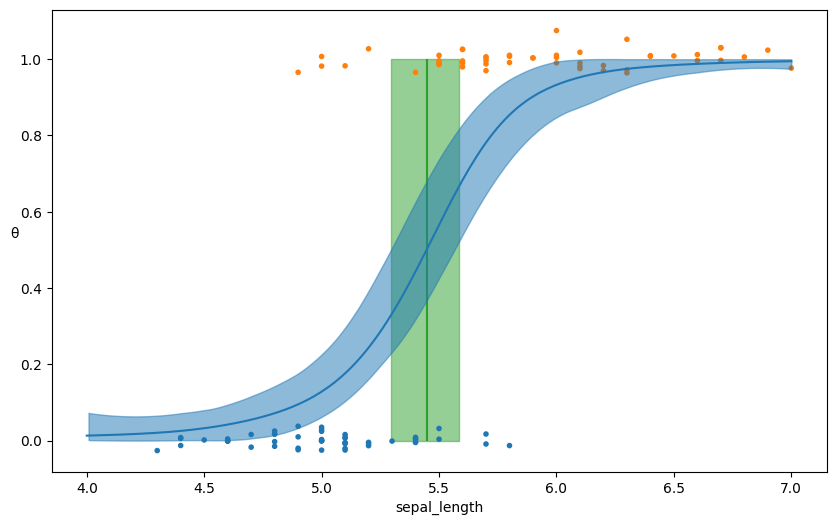

In [14]:
# plot the decision boundry
from scipy.special import expit as logistic

X_new = np.linspace(np.floor(x_1.min()), np.ceil(x_1.max()), 200)[:, None]

with model_iris2:
    f_pred = gp.conditional('f_pred', X_new)
    idata_iris2_subset = idata_iris2.sel(draw=slice(0, None, 100))
    pred_samples2 = pm.sample_posterior_predictive(idata_iris2_subset,
                                                   var_names=["f_pred"],
                                                   random_seed=123)
f_pred_iris2 = (pred_samples2.
                posterior_predictive.stack(samples=("chain", "draw"))['f_pred'].
                values)
_, ax = plt.subplots(figsize=(10, 6))

fp = logistic(f_pred_iris2)
fp_mean = np.mean(fp, 1)

ax.plot(X_new[:, 0], fp_mean)
# plot the data (with some jitter) and the true latent function
ax.scatter(x_1, np.random.normal(y, 0.02),
           marker='.', color=[f'C{x}' for x in y])

az.plot_hdi(X_new[:, 0], fp.T, color='C0')

decision_boundary = 0.5
db = X_new[:, 0][np.argmin(np.abs(fp - decision_boundary), 0)]
db_mean = db.mean()
db_hdi = az.hdi(db)
ax.vlines(db_mean, 0, 1, color='C2', zorder=-1)
ax.fill_betweenx([0, 1], db_hdi[0], db_hdi[1], color='C2', alpha=0.5, zorder=-1)
ax.set_xlabel('sepal_length')
ax.set_ylabel('θ', rotation=0)

/Users/davebrunner/.local/share/virtualenvs/TSM_BayMachLe-lxpApnjz/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py:121: UserWarning: A Supervisor feature is missing from FunctionGraph(AdvancedSetSubtensor(Alloc(0.0, *1 -> Shape_i{0}(*0-<Vector(float64, shape=(?,))>), *1), *0-<Vector(float64, shape=(?,))>, *2 -> ARange{dtype='int64'}(0, *1, 1), *2)).
  return self.apply(fgraph, *args, **kwargs)
/Users/davebrunner/.local/share/virtualenvs/TSM_BayMachLe-lxpApnjz/lib/python3.12/site-packages/pytensor/link/numba/dispatch/basic.py:377: UserWarning: Numba will use object mode to run AdvancedSetSubtensor's perform method
  warnings.warn(
/Users/davebrunner/.local/share/virtualenvs/TSM_BayMachLe-lxpApnjz/lib/python3.12/site-packages/pytensor/graph/rewriting/basic.py:121: UserWarning: A Supervisor feature is missing from FunctionGraph(AdvancedSetSubtensor(Alloc(0.0, *1 -> Shape_i{0}(*0-<Vector(float64, shape=(?,))>), *1), *0-<Vector(float64, shape=(?,))>, *2 -> ARange{dtype='int64

Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,0,0.57,7
,2000,0,0.59,7
,2000,0,0.58,7
,2000,0,0.58,7


Sampling: [f_pred]


Output()

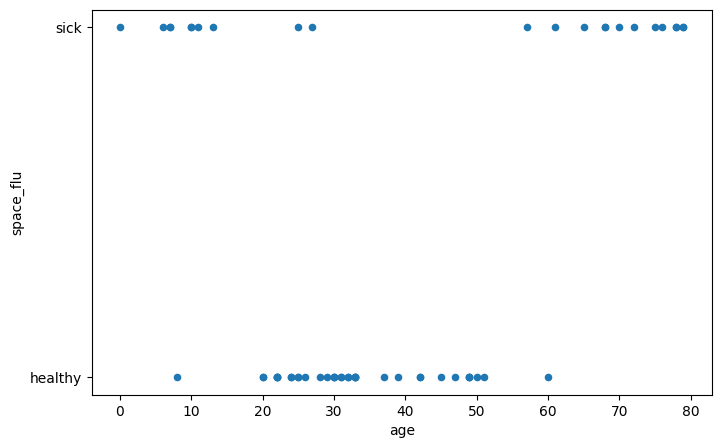

In [7]:
# GP with PyMc to predict sick or flue by age
df_sf = pd.read_csv('09_week/Data/space_flu.csv')
age = df_sf.age.values[:, None]
space_flu = df_sf.space_flu
ax = df_sf.plot.scatter('age', 'space_flu', figsize=(8, 5))
ax.set_yticks([0, 1])
ax.set_yticklabels(['healthy', 'sick'])

with pm.Model() as model_space_flu:
    ℓ = pm.InverseGamma('ℓ', **get_ig_params(age))
    cov = pm.gp.cov.ExpQuad(1, ℓ) + pm.gp.cov.WhiteNoise(1E-5)
    gp = pm.gp.Latent(cov_func=cov)
    f = gp.prior('f', X=age)
    y_ = pm.Bernoulli('y', p=pm.math.sigmoid(f), observed=space_flu)
    idata_space_flu = pm.sample(nuts_sampler="nutpie", random_seed=123)

# Predict for new age
X_new = np.linspace(0, 80, 200)[:, None]
with model_space_flu:
    f_pred = gp.conditional('f_pred', X_new)
    idata_space_flu_subset = idata_space_flu.sel(draw=slice(0, None, 100))
    pred_samples_flu = pm.sample_posterior_predictive(idata_space_flu_subset, var_names=["f_pred"], random_seed=123)
f_pred_space_flu = pred_samples_flu.posterior_predictive.stack(samples=("chain", "draw"))['f_pred'].values

In [1]:
# Gibbs sampling
import random
from collections import Counter
import math

# Define weights for the states
weights = {
    (0, 1, 1): 4,
    (0, 1, 2): 4,
    (1, 1, 1): 4,
    (1, 1, 2): 4,
    (1, 2, 1): 2,
    (1, 2, 2): 8
}

# Initialize state vector randomly
current_state = [random.choice([0, 1, 2]) for _ in range(3)]
print(current_state)

# Number of iterations
num_iterations = 1_000_000

# Initialize counters for marginal probabilities
counts = Counter()


# Sampling function
def sample_variable(index, state):
    # Generate the conditional distribution for the variable
    conditional_weights = []
    for value in [0, 1, 2]:
        new_state = state[:]
        new_state[index] = value
        weight = weights.get(tuple(new_state), 0)
        conditional_weights.append((value, weight))

    # Normalize weights to create a probability distribution
    total_weight = sum(w for _, w in conditional_weights)
    if total_weight is None or math.isnan(total_weight) or total_weight == 0:
        # Handle the zero or NA weight case: assign probabilities of 0
        probabilities = [(v, 0) for v, _ in conditional_weights]
    else:
        probabilities = [(v, w / total_weight) for v, w in conditional_weights]

    # Sample from the conditional distribution
    r = random.random()
    cumulative = 0
    for value, prob in probabilities:
        cumulative += prob
        if r < cumulative:
            return value
    return probabilities[-1][0]  # Fallback in case of rounding errors


# Gibbs sampling
for _ in range(num_iterations):
    for i in range(3):  # Iterate over each variable x1, x2, x3
        current_state[i] = sample_variable(i, current_state)
    counts[tuple(current_state)] += 1

# Compute estimated marginal probabilities
marginal_counts = Counter()
for state, count in counts.items():
    for i, value in enumerate(state):
        marginal_counts[(i, value)] += count
marginal_probabilities = {
    (i, v): marginal_counts[(i, v)] / num_iterations for i in range(3) for v in [0, 1, 2]
}

# Output results
print("Counts for each variable and value:")
for (i, v), count in marginal_counts.items():
    print(f"X_{i + 1}={v}: {count}")

print("\nEstimated marginal probabilities:")
for (i, v), prob in marginal_probabilities.items():
    print(f"P(X_{i + 1}={v}): {prob:.3f}")

[0, 2, 1]
Counts for each variable and value:
X_1=1: 692356
X_2=1: 614089
X_3=1: 384079
X_1=0: 307644
X_3=2: 615921
X_2=2: 385911

Estimated marginal probabilities:
P(X_1=0): 0.308
P(X_1=1): 0.692
P(X_1=2): 0.000
P(X_2=0): 0.000
P(X_2=1): 0.614
P(X_2=2): 0.386
P(X_3=0): 0.000
P(X_3=1): 0.384
P(X_3=2): 0.616


In [ ]:
# Maximum Likelihood Estimation
# Learning Bayesian Network from Data

import pandas as pd
data = pd.DataFrame(data={'fruit': ["banana", "apple", "banana", "apple", "banana","apple", "banana",
                                    "apple", "apple", "apple", "banana", "banana", "apple", "banana",],
                          'tasty': ["yes", "no", "yes", "yes", "yes", "yes", "yes",
                                    "yes", "yes", "yes", "yes", "no", "no", "no"],
                          'size': ["large", "large", "large", "small", "large", "large", "large",
                                    "small", "large", "large", "large", "large", "small", "small"]})

from pgmpy.models import BayesianNetwork

model = BayesianNetwork([('fruit', 'tasty'), ('size', 'tasty')])  # fruit -> tasty <- size


from pgmpy.estimators import ParameterEstimator
pe = ParameterEstimator(model, data)
print("\n", pe.state_counts('fruit'))  # unconditional
print("\n", pe.state_counts('tasty'))  # conditional on fruit and size

In [ ]:
# estimate_cpd() -> computes the state counts and divides each cell by the conditional sample size
from pgmpy.estimators import MaximumLikelihoodEstimator
mle = MaximumLikelihoodEstimator(model, data)
print(mle.estimate_cpd('fruit'))  # unconditional
print(mle.estimate_cpd('tasty'))  # conditional

# Calibrate all CPDs of `model` using MLE:
model.fit(data, estimator=MaximumLikelihoodEstimator)
# this can lead to overfitting because few data. According to trained model, small bananas are with p of 0 -> never tasty, which is not true. Thats why the below method

In [ ]:
# Bayesian Parameter Estimation with Smoothing


In [6]:
# Expection Maximization

from pgmpy.utils import get_example_model
from pgmpy.models import BayesianNetwork

# Load the alarm model and simulate data from it.
alarm_model = get_example_model(model="alarm")
samples = alarm_model.simulate(n_samples=int(1e3))

print(samples.head())

# Define a new model with the same structure as the alarm model.
new_model = BayesianNetwork(ebunch=alarm_model.edges())

model_latent = BayesianNetwork(alarm_model.edges(), latents={'HISTORY', 'CVP'})
samples_latent = samples.drop(['HISTORY', 'CVP'], axis=1)
from pgmpy.estimators import ExpectationMaximization as EM

# Generate HTML table for each CPD
# Initialize the EM estimator
em_est = EM(model=model_latent, data=samples_latent)

# Iterate through CPDs generated by the model§
# for cpd in em_est.get_parameters():
    # print(f"Conditional Probability Distribution for {cpd.variable}:")
    # print(cpd)

  0%|          | 0/37 [00:00<?, ?it/s]

  DISCONNECT INSUFFANESTH SAO2 VENTMACH    HR EXPCO2   PRESS     PAP  \
0      FALSE        FALSE  LOW   NORMAL  HIGH    LOW    HIGH  NORMAL   
1      FALSE        FALSE  LOW   NORMAL  HIGH    LOW  NORMAL  NORMAL   
2      FALSE        FALSE  LOW   NORMAL  HIGH    LOW     LOW  NORMAL   
3      FALSE        FALSE  LOW   NORMAL  HIGH    LOW    HIGH  NORMAL   
4       TRUE        FALSE  LOW   NORMAL  HIGH    LOW    HIGH  NORMAL   

  LVFAILURE KINKEDTUBE  ... HYPOVOLEMIA ARTCO2     CVP ANAPHYLAXIS  \
0     FALSE      FALSE  ...       FALSE   HIGH  NORMAL       FALSE   
1     FALSE      FALSE  ...       FALSE   HIGH  NORMAL       FALSE   
2     FALSE      FALSE  ...       FALSE   HIGH  NORMAL       FALSE   
3     FALSE      FALSE  ...       FALSE   HIGH  NORMAL       FALSE   
4     FALSE      FALSE  ...       FALSE    LOW  NORMAL       FALSE   

  STROKEVOLUME   HREKG INTUBATION VENTTUBE MINVOL    HRBP  
0          LOW    HIGH     NORMAL      LOW   ZERO  NORMAL  
1       NORMAL    HIGH    

In [16]:
# Define Bayesian Network Inference
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianNetwork([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])

# Defining individual CPDs.
cpd_d_sn = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]], state_names={'D': ['Easy', 'Hard']})
cpd_i_sn = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]], state_names={'I': ['Dumb', 'Intelligent']})
cpd_g_sn = TabularCPD(variable='G', variable_card=3,
                      values=[[0.3, 0.05, 0.9,  0.5],
                              [0.4, 0.25, 0.08, 0.3],
                              [0.3, 0.7,  0.02, 0.2]],
                      evidence=['I', 'D'],
                      evidence_card=[2, 2],
                      state_names={'G': ['A', 'B', 'C'],
                                   'I': ['Dumb', 'Intelligent'],
                                   'D': ['Easy', 'Hard']})

cpd_l_sn = TabularCPD(variable='L', variable_card=2,
                      values=[[0.1, 0.4, 0.99],
                              [0.9, 0.6, 0.01]],
                      evidence=['G'],
                      evidence_card=[3],
                      state_names={'L': ['Bad', 'Good'],
                                   'G': ['A', 'B', 'C']})

cpd_s_sn = TabularCPD(variable='S', variable_card=2,
                      values=[[0.95, 0.2],
                              [0.05, 0.8]],
                      evidence=['I'],
                      evidence_card=[2],
                      state_names={'S': ['Bad', 'Good'],
                                   'I': ['Dumb', 'Intelligent']})

# These defined CPDs can be added to the model. Since, the model already has CPDs associated to variables, it will
# show warning that pmgpy is now replacing those CPDs with the new ones.
model.add_cpds(cpd_d_sn, cpd_i_sn, cpd_g_sn, cpd_l_sn, cpd_s_sn)
model.check_model()
print(model.get_cpds('G'))
print("Cardinality: ", model.get_cardinality('G'))

+------+---------+---------+----------------+----------------+
| I    | I(Dumb) | I(Dumb) | I(Intelligent) | I(Intelligent) |
+------+---------+---------+----------------+----------------+
| D    | D(Easy) | D(Hard) | D(Easy)        | D(Hard)        |
+------+---------+---------+----------------+----------------+
| G(A) | 0.3     | 0.05    | 0.9            | 0.5            |
+------+---------+---------+----------------+----------------+
| G(B) | 0.4     | 0.25    | 0.08           | 0.3            |
+------+---------+---------+----------------+----------------+
| G(C) | 0.3     | 0.7     | 0.02           | 0.2            |
+------+---------+---------+----------------+----------------+
Cardinality:  3


In [17]:
# Getting the local independencies of a variable.
model.local_independencies('G')

(G ⟂ S | I, D)

In [18]:
# Getting all the local independencies in the network.
model.local_independencies(['D', 'I', 'S', 'G', 'L'])

(D ⟂ I, S)
(I ⟂ D)
(S ⟂ L, G, D | I)
(G ⟂ S | I, D)
(L ⟂ I, S, D | G)

In [19]:
model.active_trail_nodes('D')

{'D': {'D', 'G', 'L'}}

In [20]:
model.active_trail_nodes('D', observed='G')

{'D': {'D', 'I', 'S'}}

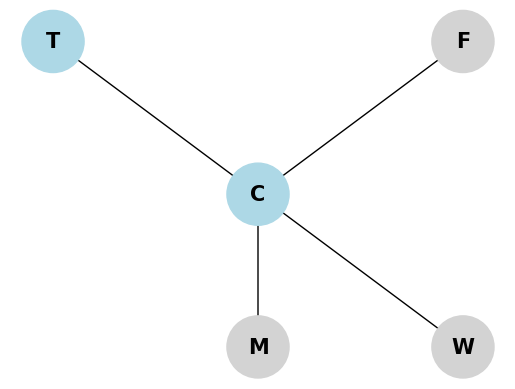

In [23]:
# Bayesian Network
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian Network structure
model = BayesianNetwork([('T', 'C'), ('F', 'C'), ('C', 'M'), ('C', 'W')])

# Convert pgmpy model to a networkx graph for visualization
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Define positions and colors for nodes
pos = {
    'T': (0, 1),
    'C': (1, 0),
    'F': (2, 1),
    'M': (1, -1),
    'W': (2, -1)
}
node_colors = {
    'T': 'lightblue',
    'C': 'lightblue',
    'F': 'lightgray',
    'M': 'lightgray',
    'W': 'lightgray'
}

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes()], node_size=2000)
nx.draw_networkx_labels(G, pos, font_size=15, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)

plt.axis('off')  # Turn off the axis
plt.show()

In [25]:
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
# Fit Bayesian Network with BayesianEstimator
model.fit(df, estimator=BayesianEstimator,  prior_type="BDeu")



# Check the model and print CPDs
print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

NameError: name 'df' is not defined